# Esercitazione 2

# Prima parte: integrazione Monte Carlo

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Monaco_Monte_Carlo_1.jpg/1200px-Monaco_Monte_Carlo_1.jpg"  alt="Image" width="300" height="200">

Nella prima parte di questa esercitazione calcoliamo l'integrale 
\begin{eqnarray}\frac{\pi}{2}\int_0^1 \cos(\pi x/2) dx = 1\end{eqnarray}

con il metodo di Monte Carlo. Inizialmente estraggo numeri casuali con una distribuzione uniforme, e valuto il risultato mediando su $10^5$ campionamenti suddivisi in $100$ blocchi.

La varianza associata a una distribuzione uniforme è
\begin{eqnarray}
\sigma^2&=&\frac{\pi^2}{4}\int_0^1\cos^2(\pi x/2)-
\left(\frac{\pi}{2}\int_0^1\cos(\pi x/2)dx\right)^2\\
&=&\frac{\pi^2}{8}-1\\
&=&0.234
\end{eqnarray}

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

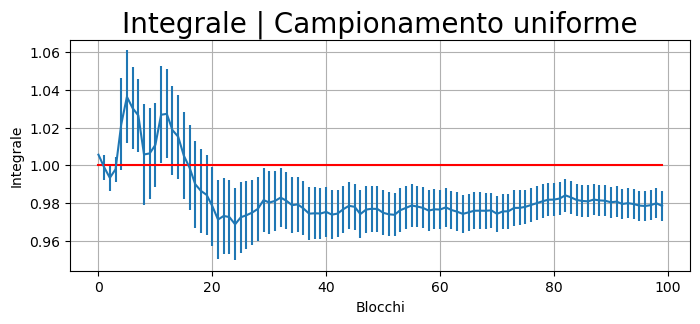

l'errore stimato sulla misura è \sigma=0.0079
lo scostamento dal risultato è 0.0216


In [69]:
sum_prog, err_prog = np.loadtxt("risultati/campionamentoUniforme.txt", unpack=True)

N=sum_prog.shape[0]
x=np.arange(N)

pi_array = np.full(N, 1)

plt.figure(figsize=(8,3))
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Integrale | Campionamento uniforme", fontsize=20)
plt.plot(x, pi_array, label='pi', color="red")
plt.xlabel('Blocchi')
plt.ylabel('Integrale')
plt.grid(True)
plt.show()
print ("l'errore stimato sulla misura è \sigma={:.4f}".format(err_prog[-1]))
print("lo scostamento dal risultato è {:.4f}".format(1-sum_prog[-1]))

L'errore stimato sulla misura è 
$$\sigma=0.0079$$
Lo scostamento dal risultato è $$\langle r\rangle -1=0.0216$$ che si discosta dal risultato di circa $3\sigma$. Pertanto, la stima non è molto accurata.

## Campionamento per importanza


Dato un integrale
\begin{eqnarray}
I=\int g(x)p(x)dx
\end{eqnarray}
una tecnica per ridurre la varianza è scriverlo nella forma
\begin{eqnarray}
I=\int \frac{g(x)p(x)}{d(x)}d(x)dx
\end{eqnarray}
La varianza sarà data quindi da
\begin{eqnarray}
\sigma^2&=&\Bigg\langle\left(\int\frac{gp}{d}dx\right)^2\Bigg\rangle-
\Bigg\langle\int\frac{gp}{d}dx\Bigg\rangle^2\\&=&
\int\left(\frac{g(x)p(x)}{d(x)}\right)^2d(x)dx-I^2
\end{eqnarray}
La funzione $d(x)$ che minimizza $\sigma^2$ si può trovare minimizzando il funzionale
\begin{eqnarray}
L[d]=\int\left(\frac{g(x)p(x)}{d(x)}\right)^2d(x)dx+\lambda\left(\int d(x)dx-1\right)
\end{eqnarray}
dove il moltiplicatore $\lambda$ garantisce la normalizzazione. Variando in $d$ si ha
\begin{eqnarray}
0&=&\frac{\delta L}{\delta d}\\
&=&-\left(\frac{g(x)p(x)}{d(x)}\right)^2+\lambda
\end{eqnarray}
da cui
\begin{eqnarray}
d(x)=\lambda|g(x)p(x)|\end{eqnarray}
Dove $\lambda$ si determina dalla normalizzazione.

Se $g$ è positiva, allora si ha $\lambda=1/I$, per cui
\begin{eqnarray}
d(x)=\frac{g(x)p(x)}{I}
\end{eqnarray}
Dunque nel limite in cui l'integrale $I$ è già noto, posso effettuare il calcolo con Monte Carlo con varianza nulla. Nella pratica, mi aspetto che distribuzioni simili possano comunque ridurre la varianza.

L'idea alla base del campionamento per importanza è che alcuni valori delle variabili casuali di ingresso in una simulazione hanno un impatto maggiore sul parametro che viene stimato rispetto ad altri. Se questi valori importanti vengono enfatizzati campionando più frequentemente, allora la varianza dell'estimatore può essere ridotta. Pertanto, la metodologia di base nell'importance sampling consiste nello scegliere una distribuzione che favorisce i valori importanti. L'uso di distribuzioni con pregiudizio statistico porterà a un estimatore pregiudicato se applicato direttamente nella simulazione. Tuttavia, i risultati della simulazione sono pesati per correggere l'uso della distribuzione pregiudicata, e ciò garantisce che il nuovo estimatore del campionamento per importanza sia non pregiudicato. Il peso è dato dal rapporto di verosimiglianza, cioè la derivata di Radon-Nikodym della vera distribuzione sottostante rispetto alla distribuzione di simulazione pregiudicata.

Il problema fondamentale nell'implementare una simulazione di campionamento per importanza è la scelta della distribuzione pregiudicata che favorisce le regioni importanti delle variabili di ingresso. Scegliere o progettare una buona distribuzione pregiudicata è l'arte del campionamento per importanza. Le ricompense per una buona distribuzione possono essere enormi risparmi di tempo di esecuzione; la penalità per una cattiva distribuzione può essere tempi di esecuzione più lunghi rispetto a una simulazione di Monte Carlo generale senza campionamento per importanza.

La $p(x)$ cercata dev'essere positiva tra $0$ e $1$. 

Posso considerare lo sviluppo dell'integranda per $x\simeq 1$:
\begin{eqnarray}
\frac{\pi}{2}\cos(\pi~x/2)&\sim&1-x
\end{eqnarray}

Si ha
\begin{eqnarray}
\int_0^1(1-x)dx=\frac{1}{2}
\end{eqnarray}

Pertanto ottengo la $p(x)$ normalizzata
\begin{eqnarray}
p(x)=2(1-x)
\end{eqnarray}

La varianza associata a questa scelta è
\begin{eqnarray}
\sigma^2&=&
\int_0^1\left(\frac{g(x)}{d(x)}\right)^2d(x)dx-
\left(\frac{\pi}{2}\int_0^1\cos(\pi x/2)dx\right)^2\\
&=&\frac{\pi^2}{4}\int_0^1\frac{\cos^2(\pi x/2)}{4(1-x)^2}2(1-x)-1\\
&=&1.01674-1\\
&=&0.01674
\end{eqnarray}

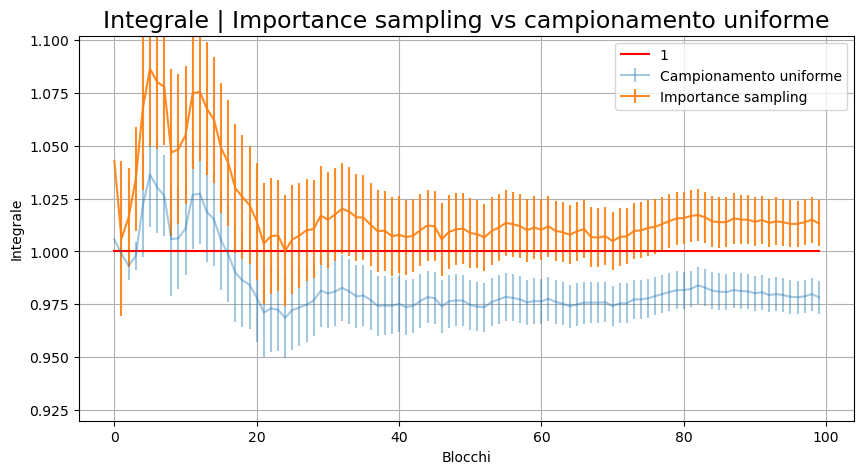

l'errore stimato sulla misura è \sigma=0.0109
lo scostamento dal risultato è 0.0133


In [67]:

sum_prog, err_prog = np.loadtxt("risultati/importanceSampling.txt", unpack=True)
sum_progUn, err_progUn = np.loadtxt("risultati/campionamentoUniforme.txt", unpack=True)

N=sum_prog.shape[0]
x=np.arange(N)

plt.figure(figsize=(10,5))
plt.errorbar(x,sum_progUn,yerr=err_progUn,alpha=0.4, label="Campionamento uniforme")
plt.errorbar(x,sum_prog,yerr=err_prog,alpha=0.9, label="Importance sampling")
plt.title("Integrale | Importance sampling vs campionamento uniforme", fontsize=17)
plt.xlabel('Blocchi')
plt.ylabel('Integrale')
plt.plot(x, pi_array, label='1', color="red")
plt.ylim([0.92,1.102])
plt.legend()
plt.grid(True)
plt.show()
print ("l'errore stimato sulla misura è \sigma={:.4f}".format(err_prog[-1]))
print("lo scostamento dal risultato è {:.4f}".format(sum_prog[-1]-1))

L'errore stimato sulla misura è 
$$\sigma=0.0109$$
Lo scostamento dal risultato è $$\langle r\rangle -1=0.0133$$ che si discosta dal risultato di circa $\sigma$. Pertanto, la stima è ora abbastanza accurata.

Il campionamento per importanza conduce a una convergenza più rapida e a una riduzione delle incertezze. Questo avviene perché l'integrazione viene campionata in regioni dove l'integranda mostra comportamenti più interessanti per il calcolo dell'integrale.

# Seconda parte: cammini casuali

## Cammino casuale su un reticolo


<img src="rw.png" width=300px>

> Caminante, son tus huellas<br>
  el camino, y nada mas;<br>
  caminante, no hay camino,<br>
  se hace camino al andar.<br>
  Al andar se hace camino, <br>
  y al volver la vista atrás<br>
  se ve la senda que nunca<br>
  se ha de volver a pisar.<br>
  Caminante, no hay camino, <br>
  sino estelas en la mar.<br>
  
  (Antonio Machado)

Un cammino casuale su reticolo è un processo di Markov. In un reticolo in $d$ dimensioni, si può istituire la relazione di ricorrenza tra le probabilità $P$ in temi successivi $t$ e $t+1$:
\begin{eqnarray}
P({\bf x},t+1;{\bf x}_0,t_0)=\frac{1}{2d}\sum_{\bf x'}P({\bf x}',t;{\bf x}_0,t_0)
\end{eqnarray}
dove la somma è su tutte le posizioni $\bf x'$ prime vicine di $\bf x$. La relazione segue dal fatto che l'esploratore può raggiungere il punto $\bf x$ solo se, un'unità di tempo prima, era su un sito vicino ${\bf x}'={\bf x}\pm{\bf e}_\mu$.
Questa relazione si può riscrivere usando una versione discretizzata, $\Delta_{\bf r}$, dell'operatore laplaciano $\Delta$:
\begin{eqnarray}
\Delta_{\bf r}f({\bf x})=\frac{1}{2dD}\sum_{\mu=1}^d\{f({\bf x+e_\mu})+f({\bf x-e_\mu})-2f({\bf x})\}
\end{eqnarray}
dato che
\begin{eqnarray}
P({\bf x},t-1;{\bf x}_0,t_0)-P({\bf x},t;{\bf x}_0,t_0)=D\Delta_{\bf r}
P({\bf x},t;{\bf x}_0,t_0)
\end{eqnarray}
Questa è un'equazione alle differenze finite che approssima l'equazione della diffusione nello spazio continuo
$$ \left(\frac{\partial}{\partial t}-D\Delta\right)P=0$$
Eseguendo una trasformata di Fourier, è possibile trovare la soluzione fondamentale nello spazio continuo,
\begin{eqnarray}
p({\bf x}_1-{\bf x}_0,t_1-t_0)&=&
\int_{-\infty}^\infty\frac{d^d{\bf k}}{(2\pi)^d}e^{-(t_1-t_0)k^2+i({\bf x_1-x_0})\cdot{\bf k}}\\
&=&\frac{1}{[4\pi(t_1-t_0)]^{d/2}}e^{-({\bf x_1-x_0})^2/4D(t_1-t_0)}
\end{eqnarray}
anche detta nucleo della diffusione. Questo processo è caratterizzato da media nulla$$\langle x(t)\rangle=0$$ e, dato che $\Delta({\bf x-x}_0)^2=2d$, ha varianza $$\langle x(t)^2\rangle=2dDt,$$ caratteristica di un moto diffusivo.

La $p$ è positiva, simmetrica, e soddisfa la legge di conservazione delle probabilità
$$\int d^d{\bf x}~p({\bf x},t;{\bf x}_0,t_0)=1,$$
la condizione iniziale
$$\lim_{t_1\rightarrow t_0}p({\bf x}_1,t_1;{\bf x}_0,t_0)=\delta^d({\bf x}_1-{\bf x}_0),$$
e l'equazione della diffusione 
$$ \left(\frac{\partial}{\partial t}-\Delta\right)p({\bf x},t;{\bf x}_0,t_0)=0.$$
Infine, si ha, per $t_2>t_1>t_0$,
$$\int d^d{\bf x}_1~p({\bf x}_2,t_2;{\bf x}_1,t_1)~p({\bf x}_1,t_1;{\bf x}_0,t_0)=p({\bf x}_2,t_2;{\bf x}_0,t_0),$$
ciò è dovuto al fatto ovvio che l'esploratore si trova certamente in qualche posto al tempo intermedio $t_1$. Quest'ultima relazione, caratteristica di un processo di Markov, è compatibile con le proprietà di convoluzione degli integrali Gaussiani e si può usare per costruire una rappresentazione con integrali di cammino che è la controparte continua di una simile proprietà sul reticolo. (see e.g. <a href=https://www.cambridge.org/core/books/statistical-field-theory/12165C27CD62CD75E6DE2BD39CE42859>Itzykson, Drouffe, 1991, Statistical field theory: From Brownian motion to renormalization and lattice gauge theory, Cambridge University Press</a>, see also <a href=https://www.ks.uiuc.edu/Services/Class/PHYS498/LectureNotes/chp3.pdf>Einstein Diffusion Equation</a>)

In [136]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

def disegnaCamminoSpazio(tipoCammino):
    
    
    num_steps = 100
    fig = plt.figure(figsize=(10, 6))
    X,Y,Z = np.loadtxt("risultati/cammino"+tipoCammino+"Pos.txt", unpack=True)
    
    ax = fig.add_subplot(121, projection='3d')
    ax.plot(X,Y,Z)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

def f (t, D):
    return  D*np.sqrt(6*t)

def disegnaGrafici(tipoCammino):
        
    yD, errD=np.loadtxt("risultati/cammino"+tipoCammino+".txt", unpack=True)
    
    N=yD.shape[0]
    x=np.arange(1,N+1)
    
    #discrete fit
    p_opt_disc, p_cov_disc = curve_fit(f, x, yD)
    y_fit = f(x,p_opt_disc[0])
    
    plt.figure(figsize=(16,5))
    
    plt.subplot(1,2,1)
    plt.errorbar(x,yD,errD,fmt='.',label='MonteCarlo data', markersize=1.5, ecolor="black")
    y_fitD = f(x,p_opt_disc)
    plt.plot(x,y_fitD,'r',linewidth=1,label='$(6~D~t)^{1/2}$')
    
    plt.grid(True)
    plt.xlabel('Passo',fontsize=13)
    plt.ylabel(r'$\langle x ^2\rangle^{1/2}$',fontsize=13)
    plt.legend()
    
    #Differences
    plt.subplot(1,2,2)
    plt.errorbar(x, yD-f(x,*p_opt_disc), yerr = errD)
    
    plt.xlabel('Passo', fontsize = 13)
    plt.ylabel(r'$\langle x^2 \rangle^{1/2}-(6~D~t)^{1/2}$', fontsize = 13)
    plt.axhline(y=0, color = 'r', linestyle = '-', linewidth = 1.5)
    
    print('fit with (6Dt)^(1/2): D =',np.sqrt(p_opt_disc),'+-',np.sqrt(p_cov_disc))


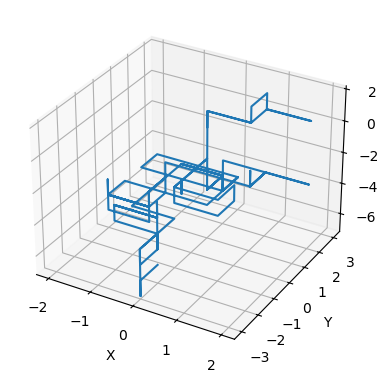

In [115]:
disegnaCamminoSpazio("Discreto")

Per verificare la relazione di Einstein
$$\langle x(t)^2\rangle=2dDt,$$
ho generato $10^4$ cammini casuali, raggruppati in $100$ blocchi.

fit with (6Dt)^(1/2): D = [0.63922843] +- [[0.00011106]]


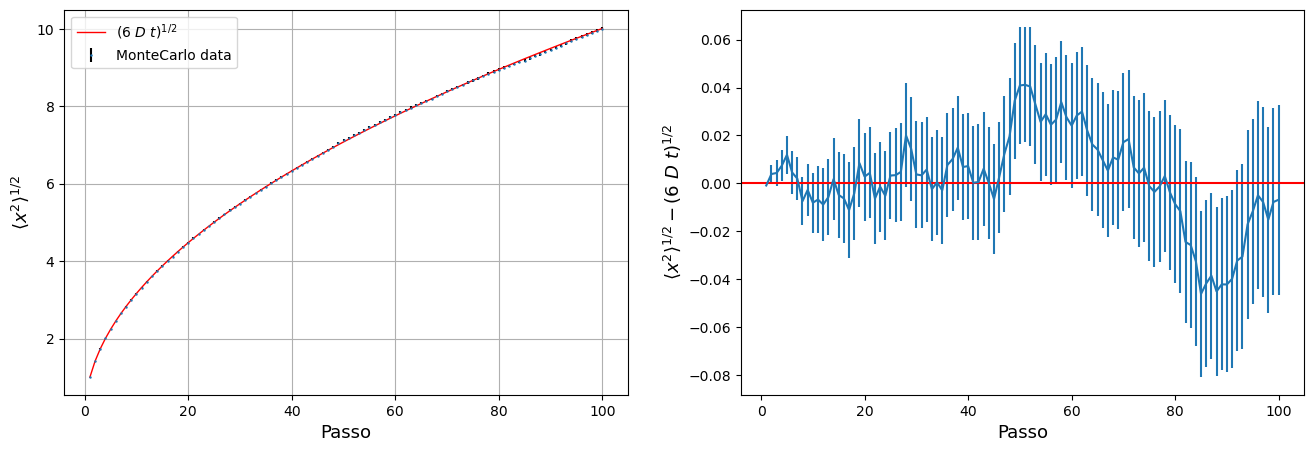

In [140]:
disegnaGrafici("Discreto")

## Cammino casuale in uno spazio continuo

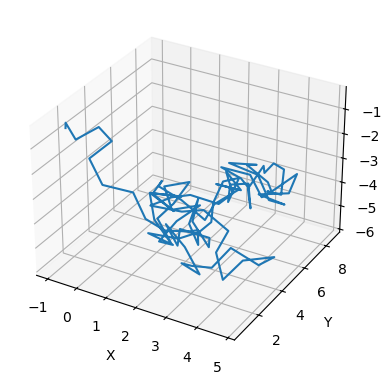

In [130]:
disegnaCamminoSpazio("Continuo")

fit with (6Dt)^(1/2): D = [0.63887415] +- [[0.00011082]]


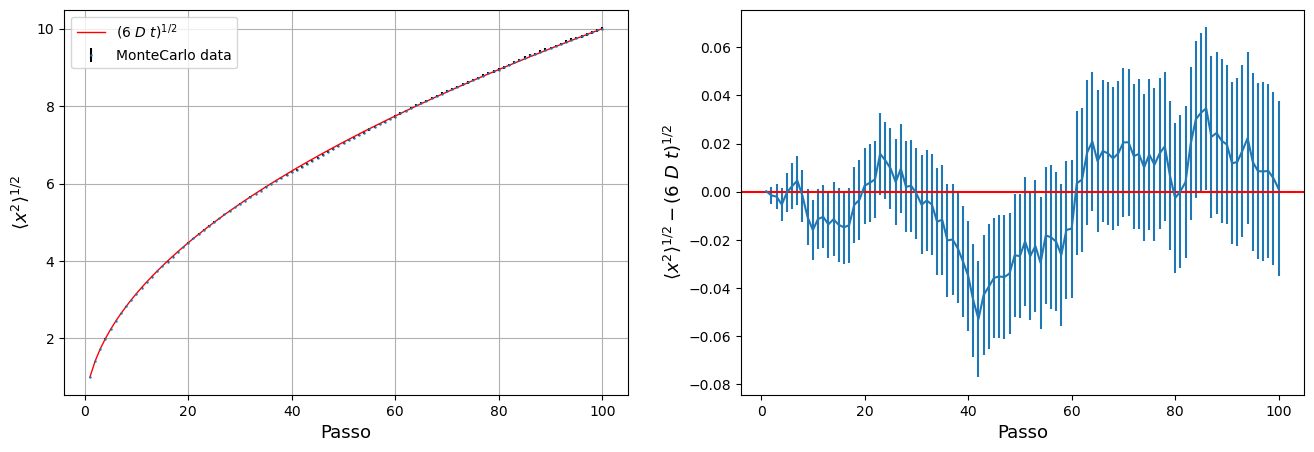

In [141]:
disegnaGrafici("Continuo")

In entrambi i casi otteniamo buon accordo con la legge di diffusione, e in ambo i casi otteniamo la medesima diffusività $D$.